In [10]:
import pandas as pd


df_p =  pd.read_csv("/run/media/jnsll/b0417344-c572-4bf5-ac10-c2021d205749/exps_modflops/results/ZLearning/" + "Prediction_PMax_SubCatch_Chronicle0_Approx0_K27.32_AllSites_Slope_Elevation_LC_SAR_Area_CV_HV_clean.csv", sep=";")

df_crits = pd.read_csv("/DATA/These/Projects/LAPrediction/notebooks/data/" + "DataInputPred_SUB_clean.csv", sep=",")

In [6]:
df_p

,Approx,Chronicle,Test Site,SubCatchment,MSE Test,R2 Test,P Real,P pred
0,0,0,1,1,0.001143,0.723806,75,125
1,0,0,1,3,0.042894,0.070568,100,125
2,0,0,1,4,0.175015,-54.706469,75,21
3,0,0,1,5,0.057168,-2.432934,100,60
4,0,0,1,6,0.009817,0.780745,100,125
...,...,...,...,...,...,...,...,...
111,0,0,29,7,0.599165,-138.605766,90,30
112,0,0,29,8,0.092725,-92.077258,3652,100
113,0,0,29,9,0.145128,-6.735319,45,30
114,0,0,29,10,0.062014,-12.301406,60,50


In [11]:
df_crits

,Site,SubCatch,Slope,Elevation,LC,SAR,Area,CV,HV,HError,Rate
0,1,1,1.203898,8.936689,319.676414,1.000254,1648125,167,211,0.000000,1.0
1,1,1,1.203898,8.936689,319.676414,1.000254,1648125,167,211,NaN,2.0
2,1,1,1.203898,8.936689,319.676414,1.000254,1648125,167,211,NaN,7.0
3,1,1,1.203898,8.936689,319.676414,1.000254,1648125,167,211,NaN,15.0
4,1,1,1.203898,8.936689,319.676414,1.000254,1648125,167,211,0.035656,21.0
...,...,...,...,...,...,...,...,...,...,...,...
6805,40,15,8.875044,224.490265,933.385135,1.006683,4387500,0,12,NaN,NaN
6806,40,16,6.585227,178.075058,700.135624,1.003876,2930625,0,20,NaN,NaN
6807,40,17,5.182087,173.802765,685.592278,1.002990,3661875,0,34,NaN,NaN
6808,40,18,4.617903,196.079285,597.577939,1.002033,5023125,0,68,NaN,NaN


In [28]:
diff_p_list = []
areas = []
slopes = []
elevations = []
lcs = []
cvs = []
hvs = []
sars = []

for row in range(len(df_p)):

    p_real = df_p.iloc[row, 6]
    p_pred = df_p.iloc[row, 7]
    diff_p = abs(p_pred-p_real)

    site = df_p.iloc[row, 2]
    subcatch = df_p.iloc[row, 3]
#& df_crits["SubCatch"]== subcatch

    df_site = df_crits.loc[df_crits["Site"]== site]

    df_site_sub = df_site.loc[df_site["SubCatch"]== subcatch]
    area = df_site_sub.iloc[0, 6]
    
    
    diff_p_list.append(diff_p)
    areas.append(area)
    slopes.append(df_site_sub.iloc[0, 2])
    elevations.append(df_site_sub.iloc[0, 3])
    lcs.append(df_site_sub.iloc[0, 4])
    sars.append(df_site_sub.iloc[0, 5])
    cvs.append(df_site_sub.iloc[0, 7])
    hvs.append(df_site_sub.iloc[0, 8])





In [37]:
def get_crits_for_subcat(site, subcatch):
    df_site = df_crits.loc[df_crits["Site"]== site]
    df_site_sub = df_site.loc[df_site["SubCatch"]== subcatch]
    area = df_site_sub.iloc[0, 6]
    slope = df_site_sub.iloc[0, 2]
    elevation = df_site_sub.iloc[0, 3]
    lc = df_site_sub.iloc[0, 4]
    sar = df_site_sub.iloc[0, 5]
    cv = df_site_sub.iloc[0, 7]
    hv = df_site_sub.iloc[0, 8]
    print(slope, elevation, lc, sar, area, cv,hv)

In [38]:
get_crits_for_subcat(2, 3)
get_crits_for_subcat(8, 3)
get_crits_for_subcat(11, 10)


2.44796347618103 27.6563262939453 672.323890208827 1.00101029872894 2250000 97 112
3.30219411849976 44.9010391235352 633.85467537457 1.00113236904144 1569375 0 96
1.17260205745697 8.39449977874756 479.24708370836 1.00023436546326 1012500 120 95


In [9]:
p_real, p_pred

(75, 125)

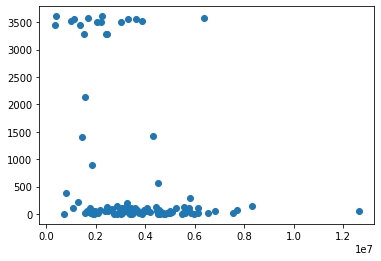

In [27]:
import matplotlib.pyplot as plt

plt.figure()

plt.plot(areas, diff_p_list, "o")



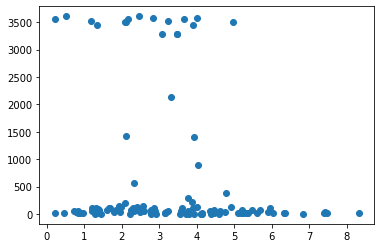

In [29]:
plt.figure()
plt.plot(slopes, diff_p_list, "o")

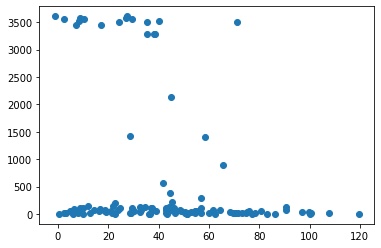

In [30]:
plt.figure()
plt.plot(elevations, diff_p_list, "o")

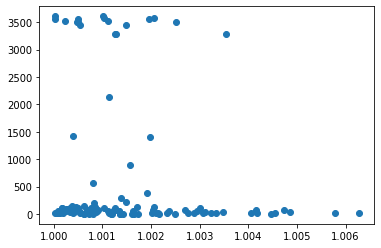

In [31]:
plt.figure()
plt.plot(sars, diff_p_list, "o")

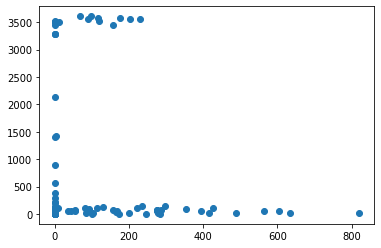

In [32]:
plt.figure()
plt.plot(cvs, diff_p_list, "o")

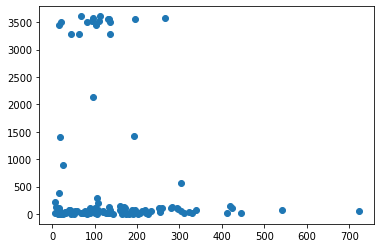

In [33]:
plt.figure()
plt.plot(hvs, diff_p_list, "o")

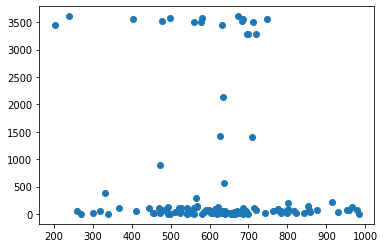

In [34]:
plt.figure()
plt.plot(lcs, diff_p_list, "o")